# Comparing models of spin-split ABS

##Definitions

Andreev bound states:

$$E^{\pm}(\varphi)$$ 
$$\Sigma(\varphi)=E^{+}(\varphi)+E^{-}(\varphi)$$
$$\delta(\varphi)=E^{+}(\varphi)-E^{-}(\varphi)$$

##Playground

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
E_0 = lambda tau, phi : np.sqrt(1 - tau * np.sin(phi/2)**2)
f_1 = lambda beta, tau, phi: tau * (tau * np.sin(phi/2)**2 - 2 * (1 - tau) + tau * beta**2)
f_2 = lambda beta, tau, phi: 2 * tau * np.sqrt(E_0(tau, phi)**2 * tau * np.sin(phi/2)**2 \
                                               + tau**2 * beta**2 * np.cos(phi/2)**2)
f_3 = lambda beta, tau, phi: tau * (4 * tau - 2 + tau * beta**2)
    
def andreev_energies_bernard(beta, tau, phi, sigma):
    num_1 = E_0(tau, phi)**2 + beta**2 * f_1(beta, tau, phi)
    num_2 = beta * f_2(beta, tau, phi)
    den = 1 + beta**2 * f_3(beta, tau, phi)
    return np.sqrt((num_1 + sigma * num_2)/den)

def andreev_energies_michelsen(beta, tau, phi, sigma):
    return np.abs(np.cos(np.arcsin(np.sqrt(tau)*np.sin(phi/2)) - sigma * beta /2))

def sigma_bernard(beta, tau, phi):
    return andreev_energies_bernard(beta, tau, phi, +1)+andreev_energies_bernard(beta, tau, phi, -1)

def sigma_michelsen(beta, tau, phi):
    return andreev_energies_michelsen(beta, tau, phi, +1)+andreev_energies_michelsen(beta, tau, phi, -1)

def delta_bernard(beta, tau, phi):
    return andreev_energies_bernard(beta, tau, phi, +1)-andreev_energies_bernard(beta, tau, phi, -1)

def delta_michelsen(beta, tau, phi):
    return andreev_energies_michelsen(beta, tau, phi, +1)-andreev_energies_michelsen(beta, tau, phi, -1)

0.0667157994312


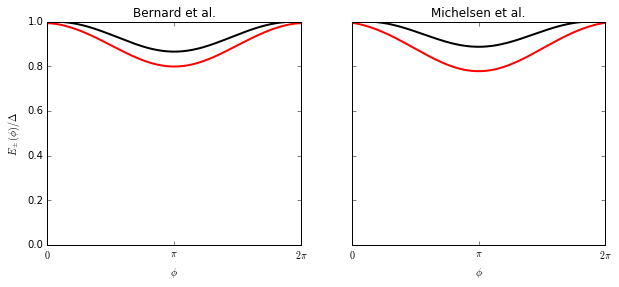

In [41]:
phis = np.linspace(0, 2*np.pi, 200)
t=0.3
beta=0.2
en_plus = andreev_energies_bernard(beta, t, phis, 1)
en_minus = andreev_energies_bernard(beta, t, phis, -1)
print(en_plus[100]-en_minus[100])
en_michelsen_plus = andreev_energies_michelsen(beta, t, phis, 1)
en_michelsen_minus = andreev_energies_michelsen(beta, t, phis, -1)
f, ax = plt.subplots(1, 2, sharey=True, figsize=(10,4))
ax[0].plot(phis, en_plus, c='k', lw=2)
ax[0].plot(phis, en_minus, c='r', lw=2)
ax[0].set_xlim([0, 2*np.pi])
ax[0].set_ylim([0, 1])
ax[0].set_title(r"Bernard et al.")
ax[0].set_ylabel(r"$E_\pm(\phi)/\Delta$")
ax[0].set_xlabel(r"$\phi$")
ax[0].set_xticks([0, np.pi, 2*np.pi])
ax[0].set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$'])
ax[1].plot(phis, en_michelsen_plus, c='k', lw=2)
ax[1].plot(phis, en_michelsen_minus, c='r', lw=2)
ax[1].set_xlim([0, 2*np.pi])
ax[1].set_xlabel(r"$\phi$")
ax[1].set_title(r"Michelsen et al.")
ax[1].set_xticks([0, np.pi, 2*np.pi])
ax[1].set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$'])
plt.show()

##Summary in first order of $\beta$

|                   | *Bernard et al.* | *Michelsen et al.* |
|----------------|-------------------|------------------|
| $E^{+}(\varphi=0)$|        1       |  $<1$         |
|rebouncing         |   no           |       yes        |
|zero phase split, $\delta(0)$    |$2\tau^2\beta^2$      | 0                |
|$\Sigma(\pi)$      | $2E_0(1-\frac{3}{2}\tau^2\beta^2)$   |$2E_0(1-\frac{\beta^2}{8})$                  |
|       $\delta(\pi)$| $2\tau^{3/2}\beta$|      $\tau^{1/2}\beta$            |
